In [1]:
#import libraries
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
from selenium.webdriver.support.ui import WebDriverWait, Select
import time

### Extract basic information of West Bengal doctors

In [28]:
url = 'https://www.nmc.org.in/information-desk/indian-medical-register/'

In [29]:
#open chrome and controlled by automated test software

driver = webdriver.Chrome()
driver.get(url)
time.sleep(8)

In [30]:
#Click--state medical council
driver.find_element(By.XPATH, '//*[@class="container"]/div/div/div/ul/li[4]/a').click()
time.sleep(3)

In [31]:
driver.find_element(By.XPATH, '//*[@class="btn-group"]/button').click()
time.sleep(4)

In [32]:
#click--click West Bengal Medical Council
driver.find_element(By.XPATH, '//*[@class="btn-group open"]/ul/li[42]/a/label').click()
time.sleep(4)

In [33]:
#click--submit
driver.find_element(By.XPATH, '//*[@id="doctor_smc_details"]').click()
time.sleep(3)

In [34]:
# loading the last page
driver.find_element(By.XPATH, '//*[@id="doct_info4_paginate"]/span/a[6]').click()
time.sleep(5)

In [46]:
#To store the  basic information of doctors from West Bengal Medical Council such as  Name, Date of Birth, Registration No, 
#Date of Reg., Qualification Year, University Name from the year of info 2010 onwards
#empty list to store all these info...
name = []
dob = []
reg_no = []
dor = []
qual_year = []
uni_name = []

In [36]:
#click to see details of last doctor on last page
driver.find_element(By.XPATH, '//*[@id="doct_info4"]/tbody/tr[265]/td[7]/a').click()
time.sleep(2)

In [19]:
name_1 = []
dob_1 = []
reg_no_1 = []
date_of_reg_1 = []
qualification_year_1 = []
university_1 = []
name_1.append(driver.find_element(By.XPATH, '//*[@id="doctorBiodata"]/tbody/tr[1]/td[2]').get_attribute('innerHTML'))

In [44]:
driver.find_element(By.XPATH, '//*[@class="modal-header"]/button').click()

In [21]:
name_1

['PARIA ASMITA&nbsp;']

In [22]:
import re

In [23]:
re.findall("[A-Z]+",name_1[0])

['PARIA', 'ASMITA']

In [40]:
driver.find_element(By.XPATH, '//*[@class="dataTables_paginate paging_simple_numbers"]/a').click()
time.sleep(4)

In [9]:
#loop to fetch 100 doctor details from last page to 5th last page.
for x in range(5):   
    for y in range(0,101):
        driver.find_element(By.XPATH, '//*[@id="doct_info4"]/tbody/tr[{}]/td[7]/a'.format(y)).click()
        time.sleep(2)
        name.append(driver.find_element(By.XPATH, '//*[@class="table table-bordered"]/tbody/tr[1]/td[2]').get_attribute('innerHTML'))
        dob.append(driver.find_element(By.XPATH, '//*[@class="table table-bordered"]/tbody/tr[3]/td[2]').get_attribute('innerHTML'))
        reg_no.append(driver.find_element(By.XPATH, '//*[@class="table table-bordered"]/tbody/tr[4]/td[2]').get_attribute('innerHTML'))
        dor.append(driver.find_element(By.XPATH, '//*[@class="table table-bordered"]/tbody/tr[4]/td[4]').get_attribute('innerHTML'))
        qual_year.append(driver.find_element(By.XPATH, '//*[@class="table table-bordered"]/tbody/tr[6]/td[4]').get_attribute('innerHTML'))
        uni_name.append(driver.find_element(By.XPATH, '//*[@class="table table-bordered"]/tbody/tr[7]/td[2]').get_attribute('innerHTML'))
        driver.find_element(By.XPATH, '//*[@class="modal-footer"]/button[2]').click()
        time.sleep(2)
    driver.find_element(By.XPATH, '//*[@class="dataTables_paginate paging_simple_numbers"]/a').click()
    time.sleep(5)

In [6]:
len(name)

497


In [3]:
import pandas as pd
import numpy as np

In [22]:
#splitted name into first and last name .. and used regex
re.findall("[A-z]+\s[A-z]+", name)
first_name = []
last_name = []
for n in name:
    last_name.append(n.split(" ")[0])
    first_name.append(n.split(" ")[1])

In [28]:
del df[df.columns[0]]

In [31]:
temp_dict = {'first_name': first_name, 'last_name' : last_name, 'dob': dob,'registration_no' : reg_no, 'Date of Reg' : dor, 'Qualification year': qual_year, 'University':uni_name}

df = pd.DataFrame(temp_dict)

In [29]:
df.head()

,first_name,last_name,dob,reg_no,dor,qual_year,Uni_name
0,Apara,"Bhuyan,",18/02/1982,65401,09/02/2010,2007,U.Dibrugarh
1,Sanghita,"Nath,",01/03/1963,65402,09/02/2010,1989,U.Gauhati
2,Fakhra,"Masroor,",29/09/1973,65403,09/02/2010,1999,U.LN Mithila
3,Ritam,"Banerjee,",14/02/1981,65404,09/02/2010,2007,"U.SMIMS, Gangtok"
4,Bijaya,"Choudhary,",27/12/1970,65405,10/02/2010,2002,U.Magadh


In [32]:
df.shape

(497, 7)

## Q-2 

In [42]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

In [5]:
cnn_data = pd.read_csv(r'C:\Users\HP\Downloads\CNN_Articels_clean.csv')

In [6]:
cnn_data.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...


In [7]:
cnn_data['Section'].value_counts()

sport             1088
europe             800
football           618
uk                 376
tennis             197
golf               173
us                 134
australia          114
motorsport         100
politics            75
entertainment       56
health              52
africa              49
opinions            45
world               44
perspectives        25
business            23
weather             18
tech                15
investing            9
asia                 9
success              9
economy              8
living               7
homes                6
china                5
middleeast           5
energy               3
americas             3
business-money       2
media                2
celebrities          1
movies               1
india                1
intl_world           1
business-food        1
cars                 1
Name: Section, dtype: int64

In [8]:
cnn_data['Category'].value_counts()

sport            2176
news             1611
business          104
politics           75
entertainment      58
health             52
Name: Category, dtype: int64

In [9]:
# wordcloud function call
wc = WordCloud(max_words = 200, regexp = "[A-Za-z']+", width = 800, height = 400, stopwords = STOPWORDS, random_state = 1234)

In [10]:
# join data
only_reviews = " ".join(cnn_data['Article text'])

In [11]:
# choose dataframe only with sport
cnn_sports = cnn_data[(cnn_data['Category'] == 'sport')]

In [12]:
# join data
only_sports = " ".join(cnn_sports['Article text'])

In [13]:
cnn_sports.head(2)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
76,100,"Ben Morse, CNN",2022-03-15 10:41:01,sport,golf,https://www.cnn.com/2022/03/15/golf/cameron-sm...,Cameron Smith claims PGA Tour's biggest payout...,Cameron Smith claimed the PGA Tour's biggest p...,"golf, Cameron Smith claims PGA Tour's biggest ...",Cameron Smith claims PGA Tour's biggest payout...,(CNN)Cameron Smith claimed the PGA Tour's big...
77,101,"Ben Morse, CNN",2022-03-15 11:22:34,sport,sport,https://www.cnn.com/2022/03/15/sport/karl-anth...,Karl-Anthony Towns records season-high NBA sco...,Karl-Anthony Towns recorded the highest indivi...,"sport, Karl-Anthony Towns records season-high ...",Karl-Anthony Towns records season-high NBA sco...,(CNN)Karl-Anthony Towns recorded the highest ...


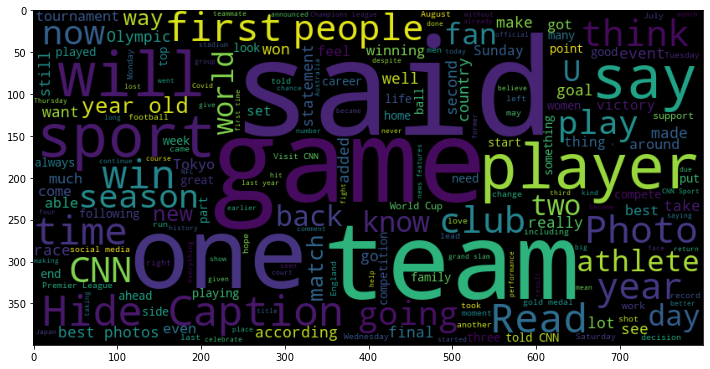

In [14]:
# make word cloud
plt.figure(figsize = (12,8))
plt.imshow(wc.generate_from_text(only_sports))
plt.show()

In [15]:
# politics category data only
cnn_politics = cnn_data[(cnn_data['Category'] == 'politics')]

In [16]:
# join data
only_politics = " ".join(cnn_politics['Article text'])

In [17]:
only_politics

'Washington (CNN)When President Joe Biden passingly said in a voting rights speech last week that he had been "arrested" in the context of the civil rights movement -- even suggesting this had happened more than once -- it was a classic Biden false claim: an anecdote about his past for which there is no evidence, prompted by a decision to ad-lib rather than stick to a prepared text, resulting in easily avoidable questions about his honesty.   Biden\'s imaginary or embellished stories about his own history were the most memorable falsehoods of his first year in office. They were not, however, the only ones. The President also made multiple false claims about important policy matters, notably including three subjects that occupied much of his time: the US withdrawal from Afghanistan, the economy and the Covid-19 pandemic. And Biden was incorrect on numerous occasions when ad-libbing about a wide assortment of facts and figures -- sometimes in a way that appeared inadvertent, but other ti

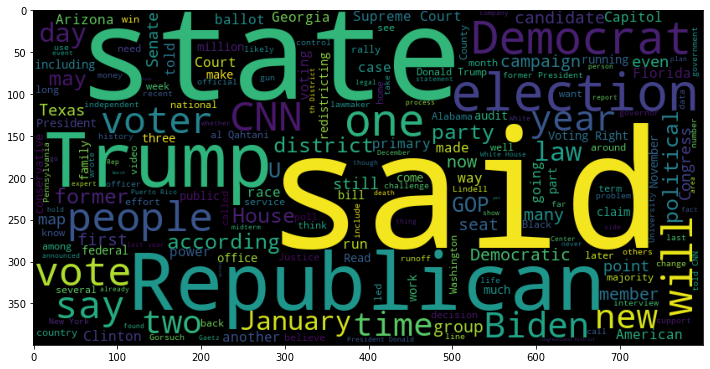

In [18]:
# wordcloud
plt.figure(figsize = (12,8))
plt.imshow(wc.generate_from_text(only_politics))
plt.show()

### LSA- 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# call countvectorizer function and fit transform data
tf = CountVectorizer(token_pattern = "[A-Za-z']+", max_df = 0.8, min_df = 10, ngram_range = (1,2))
tf_mat = tf.fit_transform(cnn_data['Article text'])

In [21]:
# sum the row wise word count in each document
word_freq_count = tf_mat.sum(axis = 0)

In [22]:
import numpy as np
freq ={k:v for k,v in zip(tf.get_feature_names_out(), np.array(word_freq_count)[0])}

In [23]:
# Add words in Stopwords
new_stopwords = STOPWORDS.copy()
new_stopwords.add('said')
new_stopwords.add('will')

In [24]:
#import essentital libraries....

from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
def LSA(csv_name, query_word, n, n_gram = (1,2)):    
    data  = pd.read_csv(csv_name)   # USE AS A PARAMETER      
    idf = TfidfVectorizer(stop_words = new_stopwords, token_pattern = "[A-Za-z']+",  max_df = 0.8, min_df = 10 , ngram_range = n_gram)
    idf_mat = idf.fit_transform(data['Article text'])
    tsvd =  TruncatedSVD(n_components = 500, n_iter = 50)
    tsvd_mat_words = tsvd.fit_transform(idf_mat.T)
    query_index = idf.vocabulary_[query_word]  # USE AS PARAMETER
    query_vec = tsvd_mat_words[query_index, :]
    dist = pairwise_distances(X = tsvd_mat_words, Y= [query_vec], metric = 'cosine' )
    top_n_word_index = np.argsort(dist.flatten())[1:(n + 1)]  # PARAMETER
    inv_vocab = {v:k for k,v in idf.vocabulary_.items()}
    temp_list = []
    for idx in top_n_word_index:
        temp_list.append(inv_vocab[idx])
    return temp_list

In [7]:
# top 5 words
top5_words = (LSA('CNN_Articels_clean.csv', 'government', 5))

In [9]:
#get the top 5 words from list
top5_freq = [freq[i] for i in top5_words]

In [11]:
# making dict with word and their count
top5_dict = {k:v for k,v in zip(top5_words,top5_freq)}

In [2]:
# calling the dict
top5_dict

{"government's": 305,
 'minister': 1602,
 'government minister': 18,
 'cabinet': 111,
 'prime minister': 939}